# Content

- PART I
- Bank Marketing Abstract
- Business Understanding
- Data set information

- PART II
- Atribute information Analysis
- Categorical to Continuous/Dummy Variables

- PART III
- Machine Learning Models (Logistic Regression, KNN, SVM, Decision Tree, Random Forest, GradientBoostingClassifier, XGBClassifier, GaussianNB)
- ROC & AUC curves
- Choosing the best model for the dependent variable

- PART IV
- Business case formulated : Lift calculated based on the probability score of each person in test set
- Adapt to IRR & NIR

- PART V
- Approaches:
- 1. Baseline model
- 2. Traditional Approach
- 3. Two Models Approach
- 4. Using a Single Model with Treatment Indicator Variabl
- 5. Four Quadrant Approach

# PART I

Bank Marketing
Abstract:

- A Portuguese bank conducted seventeen telephone marketing campaigns between May 2008 and November 2010. The bank recorded client contact information for each telephone call. 
- The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Business Understanding
- A term deposit is a deposit held at a financial institution that has a fixed term. These are generally short term with maturities ranging anywhere from a month to a few years. When a term deposit is purchased, the lender (the customer) understands that the money can only be withdrawn after a term has ended or by giving a predetermined number of days’ notice.
- Term deposits are an extremely safe investment and are therefore very appealing to conservative, low risk investors.
- Instead of mass marketing, the bank has chosen to be more proactive in identifying potential buyers and communicate straight to the customers via telephone calls.
- Direct marketing is useful here because its positive results can be measured directly.


Data Set Information:
- The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Input variables:
   Attribute Information:
1. Bank client data:
Age (numeric)
Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

2. Related with the last contact of the current campaign:

Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').

3. Other attributes:

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

4. Social and economic context attributes:

Emp.var.rate: employment variation rate - quarterly indicator (numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric)

- Output variable (desired target):

- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

Source:

Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

# PART II

In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import math

import itertools
from scipy.stats import norm

import sklearn as sk
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.cluster import KMeans
from sklearn.base import TransformerMixin
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import RandomizedSearchCV

#pylift
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, pandas as pd
from pylift import TransformedOutcome
from pylift.generate_data import dgp

# Generate some data.
df = dgp(N=10000, discrete_outcome=True)

# stats 
from scipy.stats import norm

# plot libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

#2D plots 

import chart_studio.plotly as py

#import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go


import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')


In [2]:
# load in the data

train_data = '../input/'
train_data = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\bank-additional-full.csv',delimiter =';')

# Have a grasp of how our data looks.
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
def plot_bar_with_annoation(data, title, xlabel, ylabel, figsize=(10,5)):
    """
        This functions plots the bar plot with annoation for the given data
        Args:
            data: pd.Series 
        Returns:
            None
    """
    ax = data.plot.bar(figsize=figsize);
    ax.set_title(title);
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    # add annoation to
    for p in ax.patches:
        ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() * 1.003, p.get_height() * 1.005), size=8)

In [4]:
train_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Initial descriptive summary (numerical values):

- There is a count of 41.188 observations.
- Averages : 
   - Average age of the clients : 40
   - Average call duration : 258 seconds
   - Average call number per client (campaign): 2.56
   - pdays needs feature engineering (999 means not previously contacted)
   - emp.var.rate, cons.pricce.idx, euribor3m and nr.employed will not be used for this project, thus, they will be dropped.

In [5]:
poutcomes = train_data[train_data.poutcome != 'nonexistent'].poutcome.apply(lambda x: 1 if x == 'success' else 0)
coutcomes = train_data.y.apply(lambda x: 1 if x == 'yes' else 0)

print('Number of records:', len(train_data))
print('Success Rate (Current Campaign):', coutcomes.sum() / len(train_data))
print('Success Rate (Previous Campaign):', poutcomes.sum() / len(poutcomes))

Number of records: 41188
Success Rate (Current Campaign): 0.11265417111780131
Success Rate (Previous Campaign): 0.24408888888888888


- We have a dataset with a number of 41.188 records, consisting of information about the bank clients gatheres during the promotional campaign.
- During the currect campaign, the success rate, in which a client has responded 'yes' to opening a term deposit was 11,3 %.
- During the previous campaign, the success rate was higher, couting with 24 %.

In [6]:
# Treating the variables to avoid future errors when using predictive models

dtypes = pd.DataFrame(train_data.dtypes.rename('type')).reset_index().astype('str')

# For now exclude duration since it is a poor variable for descriptive analysis, rebuild for Promotion variable !!!!!!!!
dtypes = dtypes.query('index != "duration"')
numeric = dtypes[(dtypes.type.isin(['int64', 'float64'])) & (dtypes['index'] != 'duration')]['index'].values # rebuild here
categorical = dtypes[~(dtypes['index'].isin(numeric)) & (dtypes['index'] != 'y')]['index'].values

print('Numeric:\n', numeric)
print('Categorical:\n', categorical)

Numeric:
 ['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed']
Categorical:
 ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


#Converting dependent variable from categorical to dummy
y = pd.get_dummies(train_data['y'], columns = ['y'], prefix = ['y'], drop_first = True)
train_data.head()

In [7]:
# take a look at the type, number of columns, entries, null values etc..
train_data.info()
# train_data.isnull().any() # one way to search for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
# Verify the columns
train_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# 1. Bank client data analysis and categorical treatment

- Explore the atributes related to bank clients
- For a more focused analysis, create new datasets that contain only the type of variables by section of the dataset desciption

In [9]:
# Verify the columns
train_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# 1.1. Knowing the categorical variables : client related data

In [10]:
train_data_client = train_data.iloc[: , 0:7]
train_data_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [11]:
# Find out what is inside the job category
print('Jobs:\n', train_data_client ['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [12]:
# Find out what is inside the marital category
print('Marital:\n', train_data_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [13]:
# Find out what is inside the education category
print('Education:\n', train_data_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [14]:
# Find out what is inside the marital category
print('Default:\n', train_data_client['default'].unique())
print('Housing:\n', train_data_client['housing'].unique())
print('Loan:\n', train_data_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


# 1.2. Age

- Find more insights by crossing the client related data above with 'age'

In [15]:
#Trying to find some strange values or null values
print('Min age: ', train_data_client['age'].max())
print('Max age: ', train_data_client['age'].min())
print('Null Values: ', train_data_client['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


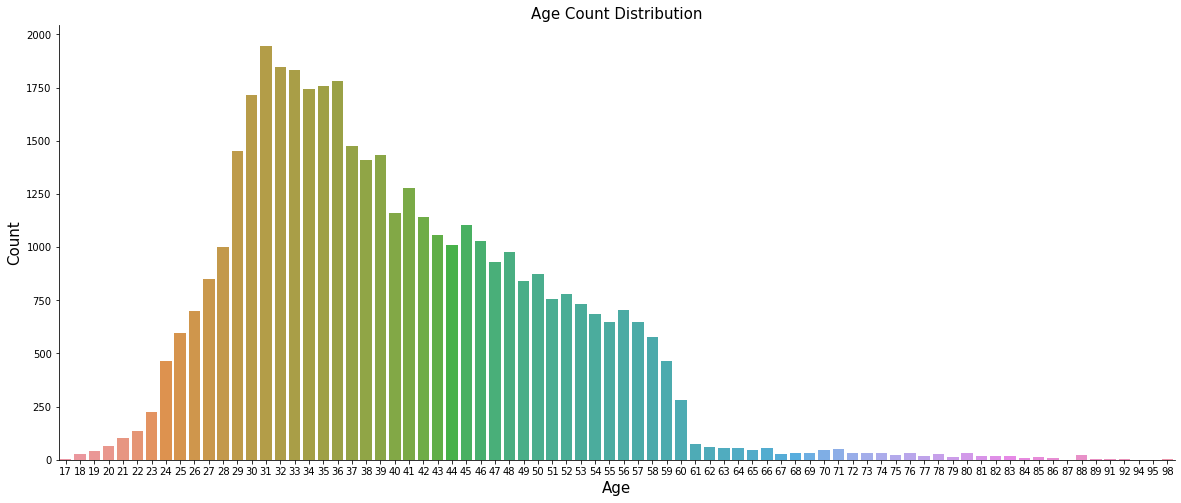

In [16]:
# AGE Distribution of the Bank Clients

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = train_data)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

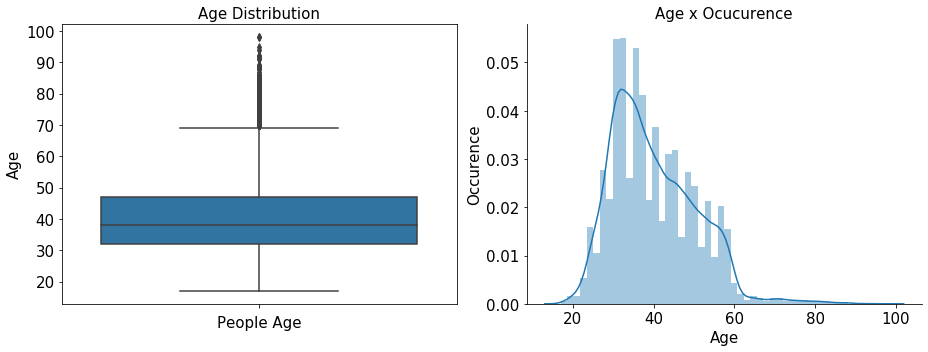

In [17]:
# How is the client age distributed, in occurences per age

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = train_data, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(train_data['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [18]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(train_data_client['age'].mean(), 1))

# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(train_data_client['age'].std(), 1))

# The best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(train_data_client['age'].std()*100/train_data_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


In [19]:
# Age Quartiles

# Quartiles
print('1º Quartile: ', train_data['age'].quantile(q = 0.25))
print('2º Quartile: ', train_data['age'].quantile(q = 0.50))
print('3º Quartile: ', train_data['age'].quantile(q = 0.75))
print('4º Quartile: ', train_data['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', train_data['age'].quantile(q = 0.75) + 
                      1.5*(train_data['age'].quantile(q = 0.75) - train_data['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [20]:
# More info about outliers

print('Numerber of outliers: ', train_data[train_data['age'] > 69.6]['age'].count())
print('Number of clients: ', len(train_data))
#Outliers in %
print('Outliers are:', round(train_data[train_data['age'] > 69.6]['age'].count()*100/len(train_data),2), '%')

Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


Summary:

- Most of the clients are aged between 30 and 50.
- Ages above 69.5 are outliers (low occurences), and consist of 469 cases (1.14%) of our dataset population.
- The Mean Age is aproximately 40 years old. (Minimum: 18 years old and Maximum: 95 years old.)
- The age standard deviation is 10.4 with a high-middle dispertion rate (26.0) this means clients age varies and doesn't strongly indicate if age is a decisive factor when deciding to open a term deposit.

# 1.3. JOBS


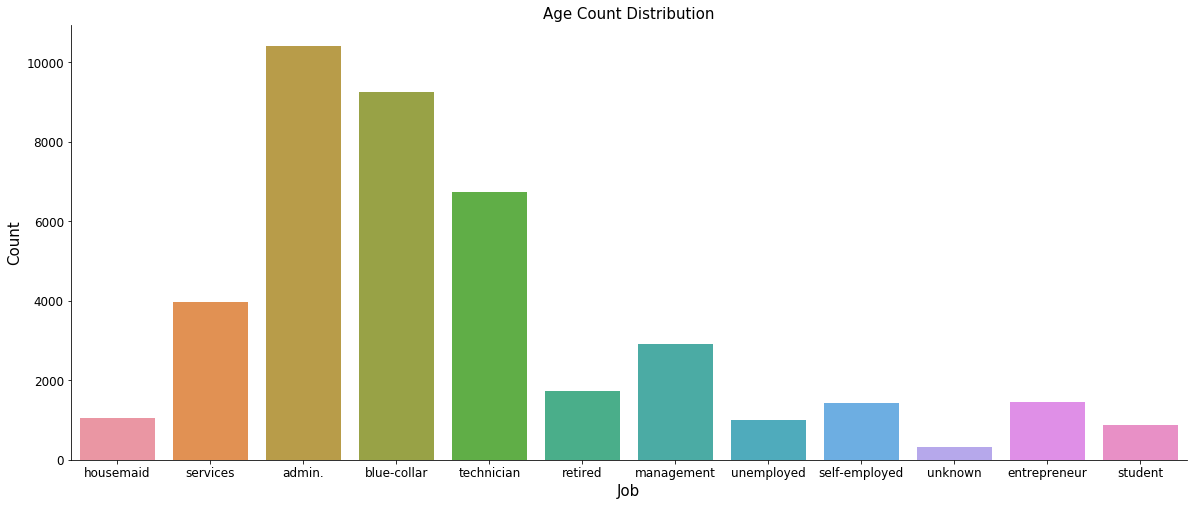

In [21]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = train_data_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=12)
sns.despine()

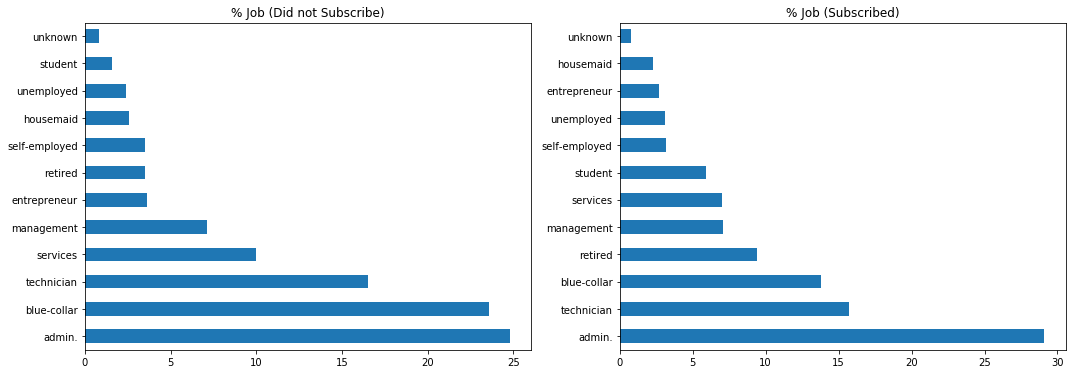

In [22]:
# What jobs did the clients who responded y='yes' have

f = plt.figure(figsize=(15,10))
plt.subplot(223)
plt.title('% Job (Did not Subscribe)')
jobs_dist_no = train_data["job"][train_data["y"] == "no"].value_counts()
jobs_no = round(jobs_dist_no/(jobs_dist_no.sum())*100,1)
jobs_no.plot(kind = "barh")

plt.subplot(224)
plt.title('% Job (Subscribed)')
jobs_dist_yes = train_data["job"][train_data["y"] == "yes"].value_counts()
jobs_yes = round(jobs_dist_yes/(jobs_dist_yes.sum())*100,1)
jobs_yes.plot(kind = "barh")

plt.tight_layout()

Summary:
- Number of Occupations:
- Admin and Blue collar and technician are the most prevalent occupations in this dataset.
- Among the occupations of the bank´s clients with the lowest occurences are : unknown, student, housemaid and unemployed.
- The monetary balance of the clients could have a high impact over the decision of subscribing for a term deposit or not. Clients with a larger balance ( probably due to a higher income) are more inclined to subscribe (y=yes).

# 1.4 MARITAL 

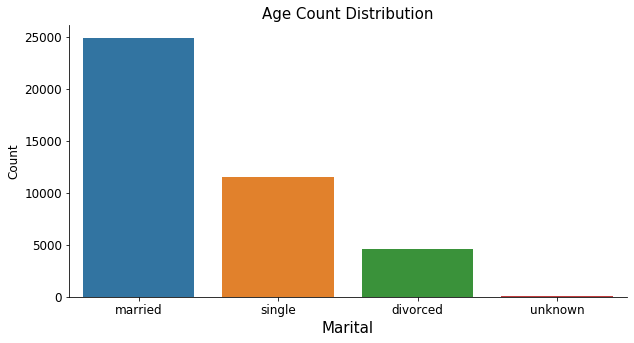

In [23]:
# What kind of 'marital status' the bank clients have

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = train_data_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=12)
sns.despine()

In [24]:
train_data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Summary:

- Most of the bank´s clients are married (24.928).

# 1.5 EDUCATION 

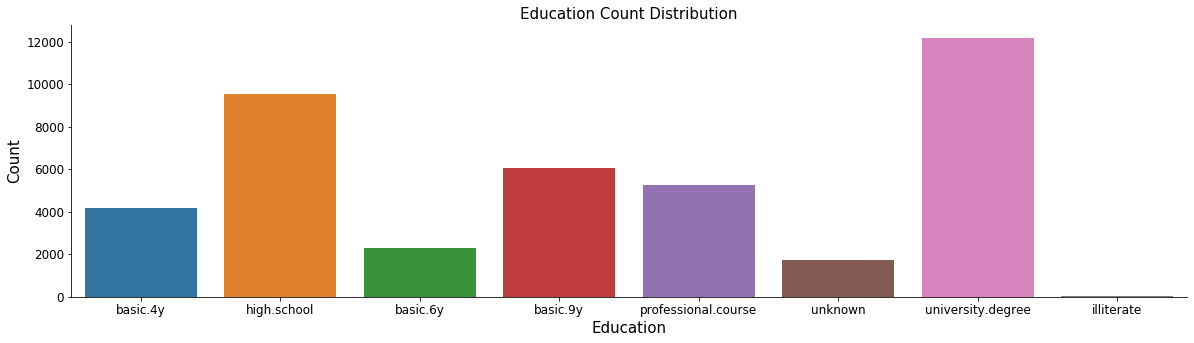

In [25]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = train_data_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=12)
sns.despine()

In [26]:
train_data_client['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Summary:

- Most of the clients have a university degree, consisting of 12.168 occurences.
- 9515 clients have a high school degree.
- 1731 clients education level is unknown.

# 1.6. DEFAULT, HOUSING, LOAN

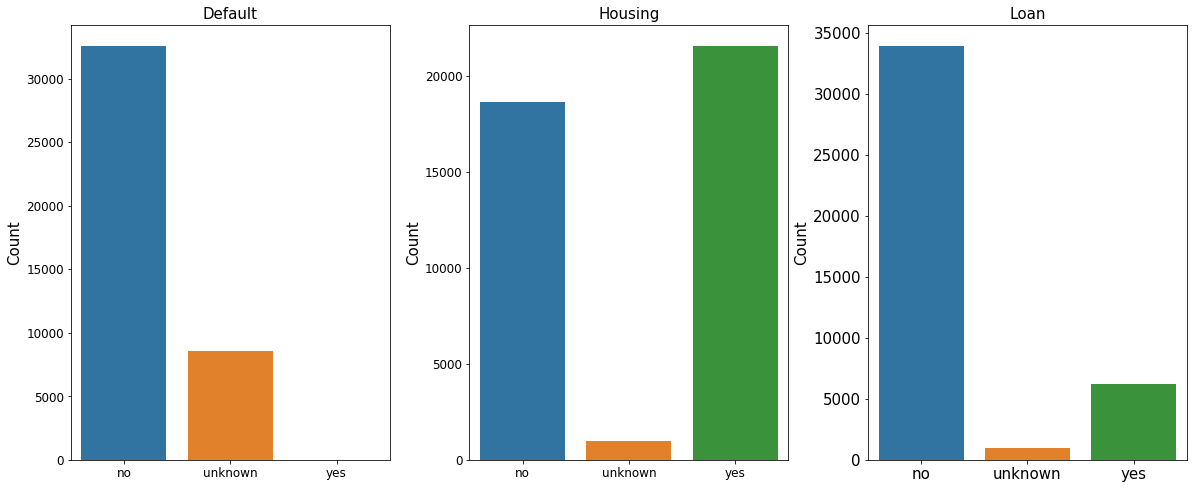

In [27]:
# Default, does the client have credit in default?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = train_data_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=12)

# Housing,does the client have a housing loan?
sns.countplot(x = 'housing', data = train_data_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=12)

# Loan,does the client have a personal loan ?
sns.countplot(x = 'loan', data = train_data_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [28]:
print('Default:\n No credit in default:'     , train_data_client[train_data_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', train_data_client[train_data_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , train_data_client[train_data_client['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3


In [29]:
print('Housing:\n No loan in Housing::'     , train_data_client[train_data_client['housing'] == 'no']     ['age'].count(),
              '\n Loan in housing Unknown:', train_data_client[train_data_client['housing'] == 'unknown']['age'].count(),
              '\n Have loan in Housing:' , train_data_client[train_data_client['housing'] == 'yes']    ['age'].count())

Housing:
 No loan in Housing:: 18622 
 Loan in housing Unknown: 990 
 Have loan in Housing: 21576


In [30]:
print('Housing:\n No to personal loan:'     , train_data_client[train_data_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', train_data_client[train_data_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , train_data_client[train_data_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


Summary:

- Default, Housing and Loan do not seem to bring new relevant information for this project´s purpose.
- Job, Marital and Education are useful for the count of each variable. 

# 1.7. Bank Client Categorical Treatment

- Featute Engineering:
   - In this section there is a need to transform categorical variables so they can fit properly into the model reqcuirements.
   

In [31]:
#  Use Label encoder from sklearn ( lbl encoder will organize subcategories alphabetically, and apply numbers to them)

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
train_data_client['job']      = labelencoder_X.fit_transform(train_data_client['job']) 
train_data_client['marital']  = labelencoder_X.fit_transform(train_data_client['marital']) 
train_data_client['education']= labelencoder_X.fit_transform(train_data_client['education']) 
train_data_client['default']  = labelencoder_X.fit_transform(train_data_client['default']) 
train_data_client['housing']  = labelencoder_X.fit_transform(train_data_client['housing']) 
train_data_client['loan']     = labelencoder_X.fit_transform(train_data_client['loan']) 

In [32]:
# Function to create age groups ( makes it easier, since there are 78 different age values in this set)
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(train_data_client);

In [33]:
# let's see how it looks now
train_data_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


- Note that the categories have been replaced by numbers. Each unique number is a representation of a subcategory ( i.e. married = 1 is equal to marital= married # remember that the lbl encoder has organized every subcategory alphabetically)

In [34]:
# Check how the client category of the dataset looks like now
print(train_data_client.shape)
train_data_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


- Note that a equivalent copy of the set has been created ( dummy set) which is used for modeling purposes
- For ML models, numbers are more easily interpreted than words, making numbers a better fit for computational purposes.

In [35]:
# Defaulu and loan variables will be dropped since they had low statistical signifficance

train_data_client = train_data_client.drop(['default','loan'],axis=1)

# 2. Related with the last contact of the current campaign

- Explore the atributes related to the current campaign
- For a more focused analysis, create new datasets that contain only the type of variables by section of the dataset desciption

In [36]:
# Slice the Data by Type : Related with the last contact of the current campaign
train_data_related = train_data.iloc[: , 7:11]
train_data_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [37]:
train_data_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [38]:
# Find out more about the variables in this category

print("\nType of Contact: \n", train_data_related['contact'].unique())
print("\nCampaign most active months: \n", train_data_related['month'].unique())
print("\nCampaign most active days of week: \n", train_data_related['day_of_week'].unique())


Type of Contact: 
 ['telephone' 'cellular']

Campaign most active months: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Campaign most active days of week: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


# 2.1 Duration

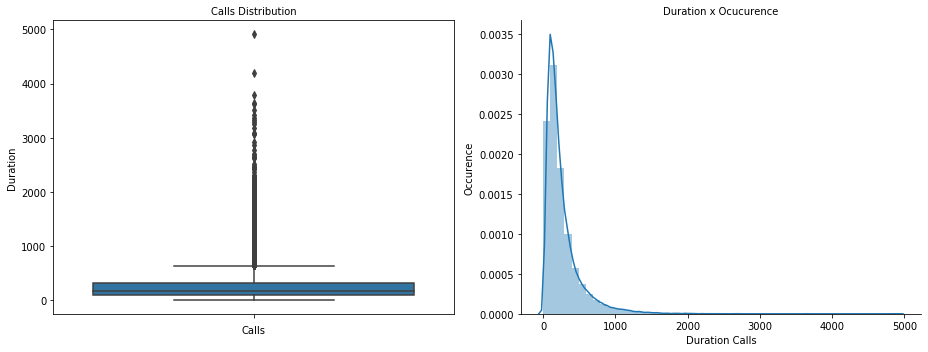

In [39]:
# Trying out a visual representation of call duration
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = train_data_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(train_data_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

- The duration variable has too many different values. It will be difficult to handle.
- For this reason, it is necessary to create an adjustment.

In [40]:
# As it was done before, with the age variable, intervals and limits can be created 
# use: .max())/60),1) if you prefer to divide by minutes

print("Max duration  call in seconds:  ", round((train_data_related['duration'].max()),1)) 
print("Min duration  call in seconds:   ", round((train_data_related['duration'].min()),1))
print("Mean duration call in seconds:   ", round((train_data_related['duration'].mean()),1))
print("STD duration  call in seconds:   ", round((train_data_related['duration'].std()),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in seconds:   4918
Min duration  call in seconds:    0
Mean duration call in seconds:    258.3
STD duration  call in seconds:    259.3


In [41]:
# Quartiles
print('1º Quartile: ', train_data_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', train_data_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', train_data_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', train_data_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', train_data_related['duration'].quantile(q = 0.75) + 
                      1.5*(train_data_related['duration'].quantile(q = 0.75) - train_data_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


The quartiles will be extremely useful in further feature engineering:

- They will be used to form 'Promotion'

In [42]:
# Look at outliers
print('Numerber of outliers: ', train_data_related[train_data_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(train_data_related))
#Outliers in %
print('Outliers are:', round(train_data_related[train_data_related['duration'] > 644.5]['duration'].count()*100/len(train_data_related),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [43]:
# How many calls have zero duration? 
train_data_related[train_data_related['duration'] == 0].count()

contact        4
month          4
day_of_week    4
duration       4
dtype: int64

# Feature engineering: Duration adaptation

- In this section, the duration variable will be adapted.


In [44]:
# To use in order to create interest levels # use 319 seconds as mean for Interest

def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(train_data_related);

- Using the quartiles of 'duration', 5 intervals have been created in order to categorize call duration as levels of interest.


# 2.2 Contact, Month, Day of Week

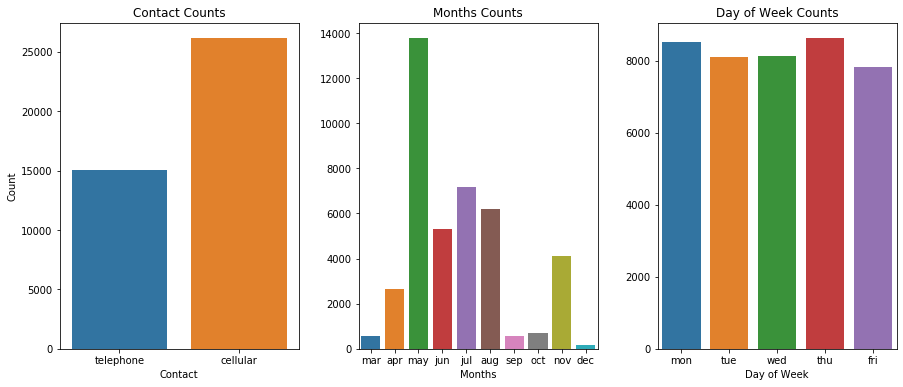

In [45]:
# More information and visual representation of Contact, Month and Day of week

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(train_data_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(train_data_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(train_data_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

# 2.3 Contact, Month, Day of Week  Categorical Treatment

In [46]:
#  Use Label encoder from sklearn ( lbl encoder will organize subcategories alphabetically, and apply numbers to them) 

# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
train_data_related['contact']     = labelencoder_X.fit_transform(train_data_related['contact']) 
train_data_related['month']       = labelencoder_X.fit_transform(train_data_related['month']) 
train_data_related['day_of_week'] = labelencoder_X.fit_transform(train_data_related['day_of_week']) 

In [47]:
# # Check how the related category of the dataset looks like now
train_data_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


# 3. Other attributes 

- Explore the atributes related to the other attributes
- For a more focused analysis, create new datasets that contain only the type of variables by section of the dataset desciption

In [48]:
# Check how the data looks
train_data_o = train_data.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
train_data_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [49]:
# Number of contacts performed during this campaign and for this client (numeric, includes last contact)
train_data_o['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [50]:
# number of days that passed by after the client was last contacted from a previous campaign
# (numeric; 999 means client was not previously contacted)
train_data_o['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [51]:
# Number of contacts performed before this campaign and for this client (numeric)
train_data_o['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [52]:
# Outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
train_data_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [53]:
# Only one categorical valiable in this type of information
#  Replace labels in order to create a better fit for the model
train_data_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [54]:
# Campaign and pdays have low statistical signifficance, they will be dropped
#train_data_o = train_data_o.drop('pdays', 1)
train_data_o = train_data_o.drop(['campaign','pdays'],axis=1)

# 4. Social and economic context attributes

In [55]:
# Check how the data looks 
## You can remove them iff needed
### Decided to drop them, they were interfering with the probabilities of a client being part of each of the 4 groups, resulting in NaN values
train_data_se = train_data.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
train_data_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


- All variables in this type of information category are numeric, hence, they do not need to be labeled or replaced by dummy variables.

In [56]:
# Check how the data looks
train_data_se = train_data.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
train_data_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


# If you want to keep y = Activate

In [57]:
# Check how the data looks. Remember that if you want to keep y, place it in part III preprocessing build
train_data_y = train_data.loc[: , ['y']]
train_data_y.head()

,y
0,no
1,no
2,no
3,no
4,no


# PART III

# Feature Engineering

- In this section, the following will be addressed:

   - Rebuilding the split sets from the previous EDA & cleaning into a new dataset.
   - Measuring interest by call duration & determine intent
   - Build the Promotion Variable
   - Campaign Groups
   - Remove unnecessary columns for the analysis
   

In [58]:
# Build a dataset with the parts that were sliced and transformed in PART II
df_data= pd.concat([train_data_client, train_data_related, train_data_o,train_data_y ],axis = 1)
#df_data = train_data[['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign','pdays','previous','poutcome',]]
df_data.shape

(41188, 12)

In [59]:
df_data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# Measuring interest by call duration & determine intent

In [60]:
# Duration & y   - where does duration become relevant to determine if the promotion was offered and convince a client to consider subscribing

# Call duration groups where clients subscribed to a term deposit

# cdy1= df_data.loc[(df_data.duration == 1) & (df_data.y == 'yes')]
# cdy2= df_data.loc[(df_data.duration == 2) & (df_data.y == 'yes')] 
#cdy3= df_data.loc[(df_data.duration == 3) & (df_data.y == 'yes')] 
# cdy4= df_data.loc[(df_data.duration == 4) & (df_data.y == 'yes')] 
# cdy5= df_data.loc[(df_data.duration == 5) & (df_data.y == 'yes')] 


# Call duration groups where clients subscribed to a term deposit

# cdn1= df_data.loc[(df_data.duration == 1) & (df_data.y == 'no')] 
# cdn2= df_data.loc[(df_data.duration ==2) & (df_data.y == 'no')]
# cdn3= df_data.loc[(df_data.duration == 3) & (df_data.y == 'no')] 
# cdn4= df_data.loc[(df_data.duration == 4) & (df_data.y == 'no')] 
# cdn5= df_data.loc[(df_data.duration == 5) & (df_data.y == 'no')] 


## count the values of cdn and cdy to find out more information.

Summary on call duration [1,2,3,4,5] & y ['yes','no']

- Total y value counts:
   - no 36.548
   - yes 4640

- Call duration & y = 'yes':

  - duration = 1 & y = yes : 87       (<= 102 seconds)
  - duration = 2 & y = yes : 477      (102:180 seconds)
  - duration = 3 & y = yes : 1077     (180:319 seconds)
  - duration = 4 & y = yes : 1473     (319:644.5 seconds)
  - duration = 5 & y = yes : 1526     (>= 644.5 seconds)

- Call duration & y = 'no':
 
  - duration = 1 & y = no : 10.226     (<= 102 seconds)
  - duration = 2 & y = no : 9915       (102:180 seconds)
  - duration = 3 & y = no : 9120       (180:319 seconds)
  - duration = 4 & y = no : 5580       (319:644.5 seconds)
  - duration = 5 & y = no : 1437       (>= 644.5 seconds)


- Duration duplicate values:
  - There are 234 duplicate occurences in duration & y = 'no'.

- Analysis:

- The longer the call duration, the more likely it is that a client will be convinced to subscribe to a term deposit.
- (180:319 seconds) seems to be the duration where most clients start being convinced by the campaign promotion pitch.
- Can use this interval (duration = 3) to create the 'Promotion'variable.

- On the other hand, most call durations are under 102 seconds long.
- As the duration increases, the number of y keeps declining. This can mean :

  - The client is not interested, and terminates the call. (<= 102 seconds;10.226 occurences)
  - The client listenes to the promotional campaign pitch, is not interested. ( 102:180 seconds;9915 occurences)
  - From this point on the numbers keep declining.
- call duration and interest are highly related 

In [61]:
# Take a look if everything is in order and properly shaped
## Use train_data_final from here on out
df_data.head()

,age,job,marital,education,housing,contact,month,day_of_week,duration,previous,poutcome,y
0,3,3,1,0,0,1,6,1,3,0,1,no
1,3,7,1,3,0,1,6,1,2,0,1,no
2,2,7,1,3,2,1,6,1,3,0,1,no
3,2,0,1,1,0,1,6,1,2,0,1,no
4,3,7,1,3,0,1,6,1,3,0,1,no


# Feature Engineering : Promotion

In [62]:
# Create the Promotion Variable
df_data.loc[df_data['duration'] >= 3, 'Promotion'] = 'Received' # Consider Promotion passed after pitch
df_data.loc[df_data['duration'] < 3, 'Promotion'] = 'Not Received' # Consider Promotion didn't pass during pitch


Summary:
- Promotion will be used to determine if a promotion has been made or not.
- If Promotion is below 3 ('duration'), it will be considered that the promotion has been made and not received. (Promotion = no)
- If Promotion is above 3 ('duration') it will be considered that the promotion has been made and was received. ( Promotion = yes)

# Campaign Groups

After finding the effective offers. Customers can be split into 4 groups:

1) clients who received offers and subscribed to a term deposit (TR) (Promotion: Recceived & y= yes)

2) clients who received an offer but did not subscribe to a term deposit (TN) (Promotion: Recceived & y= no)

3) clients who have not recieved an offer and have not subscribed to a term deposit (CN) (Promotion: Not Recceived & y= no)

4) clients who have not recieved an offer but have subscribed to a term deposit (CR) (Promotion: Not Recceived & y= yes)

In [63]:
# Check out the groups
df_data.groupby(['Promotion','y'])['Promotion'].count()

Promotion     y  
Not Received  no     20141
              yes      564
Received      no     16407
              yes     4076
Name: Promotion, dtype: int64

- 20141 clients have not recieved an offer and have not subscribed to a term deposit. Group = CN
- 564 clients have not recieved an offer but have subscribed to a term deposit. Group = CR
- 16407 clients received an offer but did not subscribe to a term deposit. Group = TN
- 4076 clients who received offers and subscribed to a term deposit . Group = TR

# Crosstabulation Information on Treatment & Outcome

- Some additional information on the relation between Promotion and y.

In [64]:
#Cross-tabulation of Treatment and Outcome in Percentage
pd.crosstab(df_data['y'], df_data['Promotion'], margins = True, normalize=True)

Promotion,Not Received,Received,All
y,,,
no,0.489002,0.398344,0.887346
yes,0.013693,0.098961,0.112654
All,0.502695,0.497305,1.000000


In [65]:
# Chance of relation between additional variables
df_data.corr()

,age,job,marital,education,housing,contact,month,day_of_week,duration,previous,poutcome
age,1.000000,-0.002732,-0.379027,-0.107467,0.000140,0.019655,-0.018201,-0.019549,-0.001787,0.013028,0.013662
job,-0.002732,1.000000,0.027897,0.134121,0.006962,-0.025132,-0.033213,-0.000844,-0.005198,0.020965,0.021125
marital,-0.379027,0.027897,1.000000,0.109220,0.010467,-0.054501,-0.007629,0.002202,0.009884,0.038689,0.040418
education,-0.107467,0.134121,0.109220,1.000000,0.016825,-0.105726,-0.082684,-0.017986,-0.017706,0.038831,0.039652
housing,0.000140,0.006962,0.010467,0.016825,1.000000,-0.082186,-0.018141,0.003339,-0.008688,0.021314,0.023741
contact,0.019655,-0.025132,-0.054501,-0.105726,-0.082186,1.000000,0.276565,-0.009575,-0.028498,-0.212848,-0.226813
month,-0.018201,-0.033213,-0.007629,-0.082684,-0.018141,0.276565,1.000000,0.027677,0.016356,0.103157,0.103156
day_of_week,-0.019549,-0.000844,0.002202,-0.017986,0.003339,-0.009575,0.027677,1.000000,0.034947,-0.004102,-0.002831
duration,-0.001787,-0.005198,0.009884,-0.017706,-0.008688,-0.028498,0.016356,0.034947,1.000000,0.045537,0.052961
previous,0.013028,0.020965,0.038689,0.038831,0.021314,-0.212848,0.103157,-0.004102,0.045537,1.000000,0.868540


# Create Treatment & Control

In [66]:
# Promotion set to 0 & 1

df_data.Promotion = df_data.Promotion.map({'Not Received': 0, 'Received': 1})

In [67]:
# y set to 0 & 1

df_data.y = df_data.y.map({'no': 0, 'yes': 1})

In [68]:
# define campaign group = Treatment & Control

df_data['campaign_group'] = 'treatment'
df_data.loc[df_data.Promotion == 0, 'campaign_group'] = 'control'



# define campaign group = Treatment & Control
#df_data['campaign_group'] = 'treatment'
#df_data.loc[df_data.Promotion == 0, 'campaign_group'] = 'control'

In [69]:
#df_data.campaign_group = df_data.Promotion.map({'control': 0, 'treatment': 1})

In [70]:
df_data.campaign_group.value_counts()

control      20705
treatment    20483
Name: campaign_group, dtype: int64

- This dataset seemps to be well distributed.
    - The control group consists of 20705 clients
    - The treatment group consists of 20483 clients

# Create the 4 Uplift Modeling Groups

- The following content has been created separately from the actual analysis and serves only to visualize the population distribution into the 4 groups


In [71]:
df_data['segment'] = ['CN'] * len(df_data) 
TR_cond = (df_data.Promotion == 1 ) & (df_data.y == 1 )
TN_cond = (df_data.Promotion == 1 ) & (df_data.y == 0)
CR_cond = (df_data.Promotion == 0) & (df_data.y == 1) 
df_data.loc[TR_cond,'segment'] =  'TR'
df_data.loc[TN_cond,'segment'] =  'TN'
df_data.loc[CR_cond,'segment'] =  'CR'

# Customer groups (TR, TN, CR, CN)

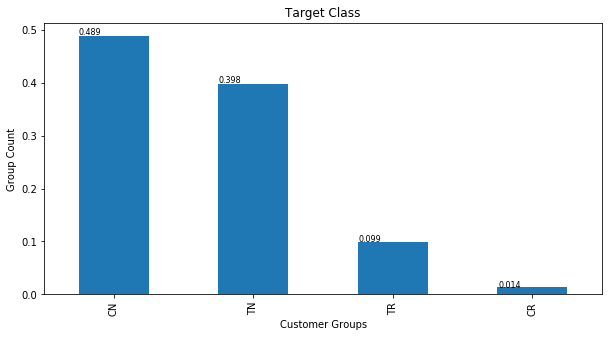

In [72]:
# Customer Groups Distribution

plot_bar_with_annoation(data=df_data.segment.value_counts()/df_data.segment.value_counts().sum(), title='Target Class',xlabel='Customer Groups', ylabel='Group Count')

In [73]:
df_data.segment.value_counts()

CN    20141
TN    16407
TR     4076
CR      564
Name: segment, dtype: int64

In [74]:
# Target class distribution between 0 a 1
df_data.segment.value_counts()/len(df_data)

CN    0.489002
TN    0.398344
TR    0.098961
CR    0.013693
Name: segment, dtype: float64

The classes inside the groups are distributed as follows:

    - 0 #CN (Control Non-responders) : 20141 (48,9%)
    - 1 #CR (Control Responders) : 16407 (39,3%)
    - 2 #TN (Treatment Non-responders) : 4076 (9.9%)
    - 3 #TR (Treatment Responders) : 564 (1,4%)

# Data Preparation

In [75]:
df_data.segment = df_data.segment.map({'CN': 0, 'CR': 1,'TN': 2, 'TR': 3})

In [76]:
df_data= df_data.drop(['campaign_group'],axis=1) # 'segment' is not present in X train but is present in Y test

In [77]:
df_data.head()

,age,job,marital,education,housing,contact,month,day_of_week,duration,previous,poutcome,y,Promotion,segment
0,3,3,1,0,0,1,6,1,3,0,1,0,1,2
1,3,7,1,3,0,1,6,1,2,0,1,0,0,0
2,2,7,1,3,2,1,6,1,3,0,1,0,1,2
3,2,0,1,1,0,1,6,1,2,0,1,0,0,0
4,3,7,1,3,0,1,6,1,3,0,1,0,1,2


# Data Modeling

In this section I will use uplift modeling for the analysis.

- Uplift modeling is an incremental modeling technique that models the incremental impact of a treatment ( in this case, a campaign). This type of modeling helps identify the segments where the promotions are effective, selecting customerswho are more likely to purchase if a promotion is given, thus creating a more profitable promotion strategy.

- There are several apporaches for uplift modeling:

      - 1)Traditional one model approach: This method predicts only customers who received promotions and subscribed. The issue with this approach is that it discards the control group data.

      - 2)Two model Uplift Approach: create 2 models to predict the purchases from the treatment and the control group respectively. The difference in the predicted probabilities of these models represents the lift value which can be used as a cutoff point for the customers responsive to promotions. The issue with this model is that it lifts indirectly.

      - 3)Four quadrant approach: split the customers into 4 Groups(treatment response: TR, treatment no response TN, control response CR, control no response CN). Then build a model to predict the label the customer belongs to. The promotions can be either sent to only TR(sure thing to respond to promotion) or create an uplift score to divide the customers based on the probability of belonging to certain groups and use cut off to decide when to send a promotion or no. 


- Xgboost algorithm ( used in pylift)

  - Xgboost stands for extreme Gradient Boosting. It is an implementation of gradient boosted decision trees but with boosting (ensemble techinque) that use models that corrects errors made by previous models. This algorithm offers speed and model performance.
  - In the previous exercise it was determined that XGBoost was the best classifier for predicting if a client would subscribe or not.
  

# Uplift Test

# Apply pylift

In [78]:
df_test = '../input/'
df_test = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\Bank-additional\testset.csv',delimiter =',')
df_test = df_test.drop(['Unnamed: 0','segment'],axis=1)


# Have a grasp of how our data looks.
df_test.head()

,age,job,marital,education,housing,contact,month,day_of_week,duration,previous,poutcome,Outcome,Treatment
0,3,7,1,1,2,0,7,4,5,0,1,0,1
1,3,9,1,5,2,0,3,2,1,0,1,0,0
2,1,1,2,0,0,0,7,2,2,0,1,0,0
3,1,7,1,5,0,1,6,1,3,0,1,0,1
4,1,1,2,3,2,0,6,2,3,0,1,0,1


In [79]:
df_data = df_data.drop(['segment'],axis=1)

In [80]:
df_data.head()

,age,job,marital,education,housing,contact,month,day_of_week,duration,previous,poutcome,y,Promotion
0,3,3,1,0,0,1,6,1,3,0,1,0,1
1,3,7,1,3,0,1,6,1,2,0,1,0,0
2,2,7,1,3,2,1,6,1,3,0,1,0,1
3,2,0,1,1,0,1,6,1,2,0,1,0,0
4,3,7,1,3,0,1,6,1,3,0,1,0,1


Uplift Modeling

- In traditional binary classification, we attempt to predict a binary outcome y based on some set of features X. Consequently, our success criterion is usually something that measures how well we can predict y based on values of X (e.g. accuracy, precision, recall).

- In uplift modeling, however, the story is quite different, because while we are still trying to predict the outcome y, we want to predict this outcome conditioned on a treatment. In other words, we want to find individuals for whom the effect of our treatment is largest.

The Transformed Outcome


Our package by default implements the Transformed Outcome (Athey 2016) method, defined as:

    -Y∗=YW−pp(1−p)
where Y∗ is the Transformed Outcome, Y is the outcome (1 or 0), W indicates the presence of a treatment (1 or 0), and p=P(W=1) (the treatment policy). When p=0.5, this amounts to labelling (treatment, outcome) pairs as follows:

Quadrant : which will be used by the 4 groups

The beauty of this transformation is that, in expectation,

    -E[Y∗]=P(Y|W=1)−P(Y|W=0)
    
or uplift. Any algorithm trained to predict Y∗, then, gives a prediction of uplift.


Source:
https://pylift.readthedocs.io/en/latest/introduction.html



Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] colsample_bytree=0.6728373061716766, gamma=1.2856056309860342, max_depth=18, min_child_weight=216, n_estimators=286, subsample=0.903920541299085 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.6728373061716766, gamma=1.2856056309860342, max_depth=18, min_child_weight=216, n_estimators=286, subsample=0.903920541299085, score=0.320, total=   9.8s
[CV] colsample_bytree=0.6728373061716766, gamma=1.2856056309860342, max_depth=18, min_child_weight=216, n_estimators=286, subsample=0.903920541299085 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


[CV]  colsample_bytree=0.6728373061716766, gamma=1.2856056309860342, max_depth=18, min_child_weight=216, n_estimators=286, subsample=0.903920541299085, score=0.308, total=   8.9s
[CV] colsample_bytree=0.6728373061716766, gamma=1.2856056309860342, max_depth=18, min_child_weight=216, n_estimators=286, subsample=0.903920541299085 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.6s remaining:    0.0s


[CV]  colsample_bytree=0.6728373061716766, gamma=1.2856056309860342, max_depth=18, min_child_weight=216, n_estimators=286, subsample=0.903920541299085, score=0.307, total=   8.8s
[CV] colsample_bytree=0.6728373061716766, gamma=1.2856056309860342, max_depth=18, min_child_weight=216, n_estimators=286, subsample=0.903920541299085 
[CV]  colsample_bytree=0.6728373061716766, gamma=1.2856056309860342, max_depth=18, min_child_weight=216, n_estimators=286, subsample=0.903920541299085, score=0.288, total=   8.8s
[CV] colsample_bytree=0.6728373061716766, gamma=1.2856056309860342, max_depth=18, min_child_weight=216, n_estimators=286, subsample=0.903920541299085 
[CV]  colsample_bytree=0.6728373061716766, gamma=1.2856056309860342, max_depth=18, min_child_weight=216, n_estimators=286, subsample=0.903920541299085, score=0.270, total=   8.7s
[CV] colsample_bytree=0.7504777246888372, gamma=7.868834299530273, max_depth=14, min_child_weight=109, n_estimators=487, subsample=0.8229237606336517 
[CV]  cols

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 83.5min finished


0.09050982531803545


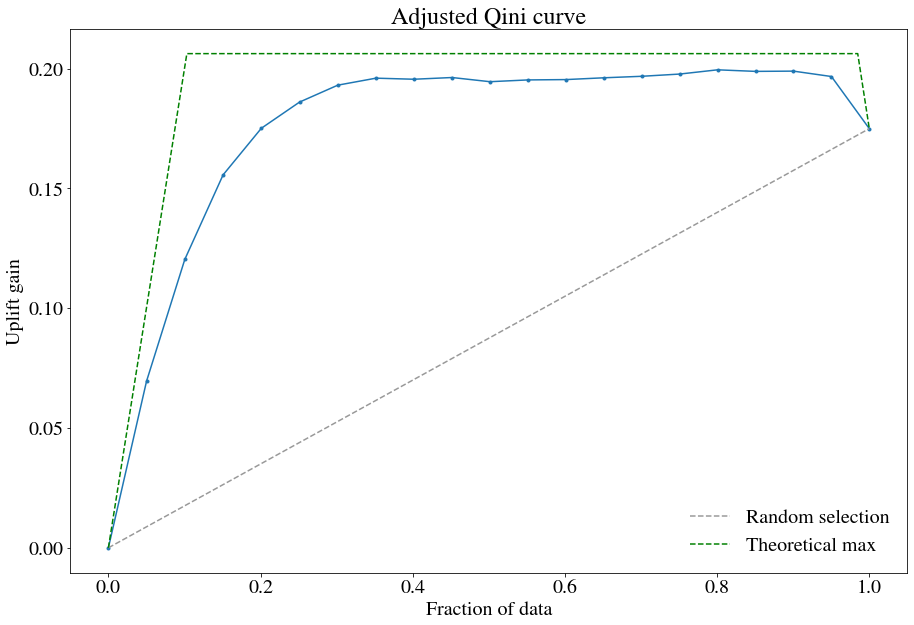

In [81]:
from pylift import TransformedOutcome
up = TransformedOutcome(df_data, col_treatment='Promotion', col_outcome='y')

up.randomized_search(n_iter=200)
up.fit(**up.rand_search_.best_params_)

up.plot(plot_type='aqini', show_theoretical_max=True)
print(up.test_results_.Q_aqini)

In [82]:
# Test results were 90,5% accurate for aqini


up.test_results_.Q_aqini

0.09050982531803545

In [83]:
# Test results were 91,54% accurate for qini

up.test_results_.Q_qini

0.09154351053186921

# Net Weight of Evidence

- Net Weight of Evidence (NWOE) is the difference in Weight of Evidence (WOE) between the treatment and control groups.

     - NWOE=WOEt−WOEc

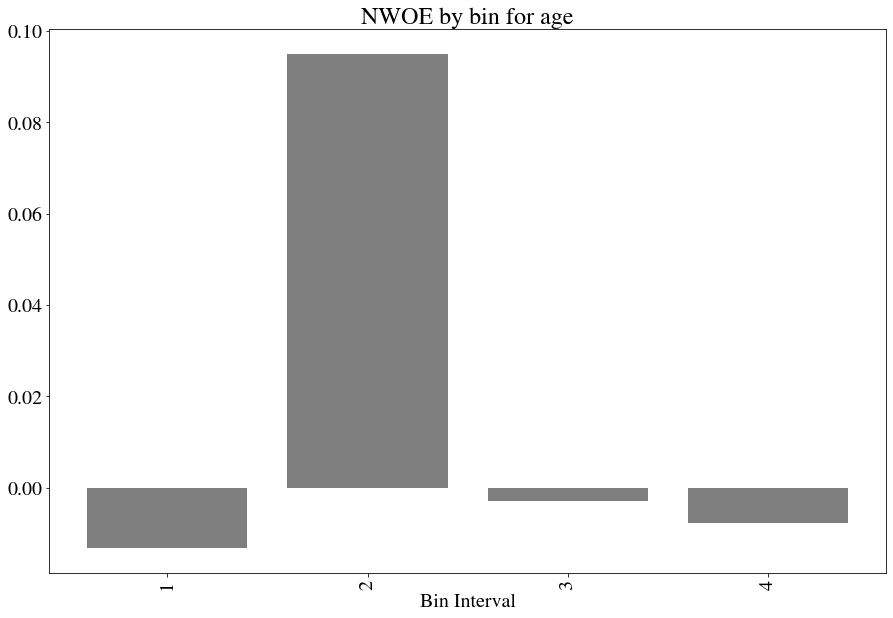

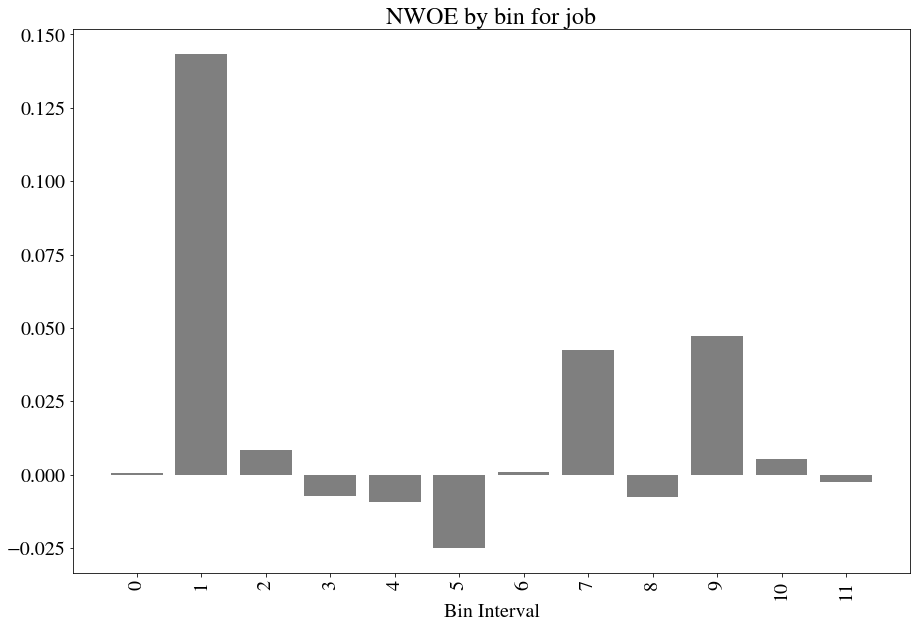

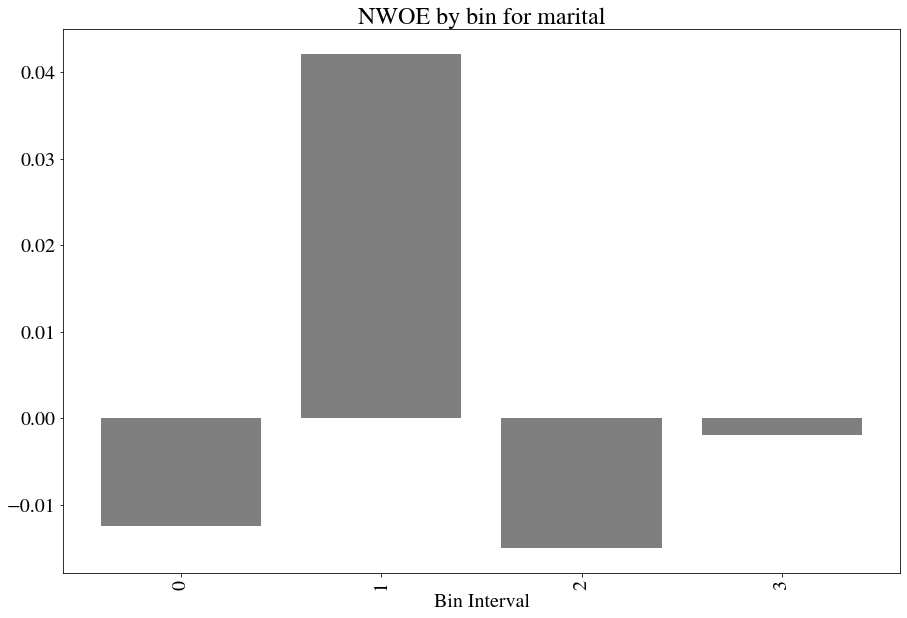

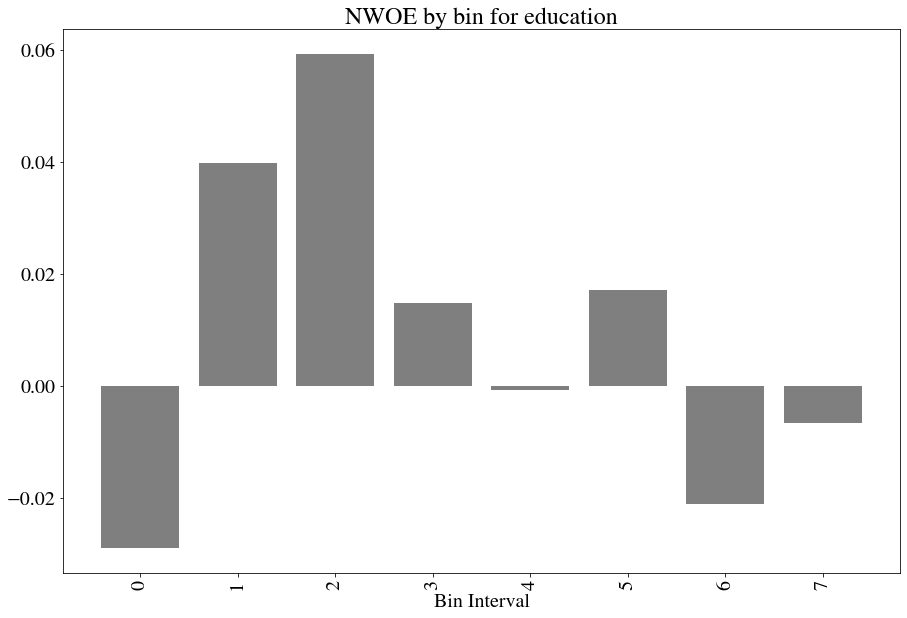

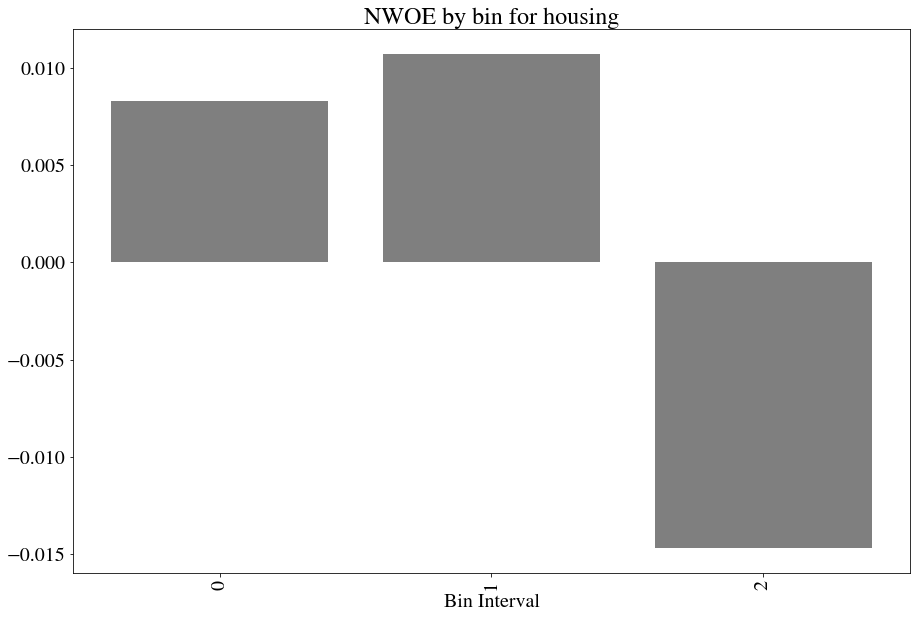

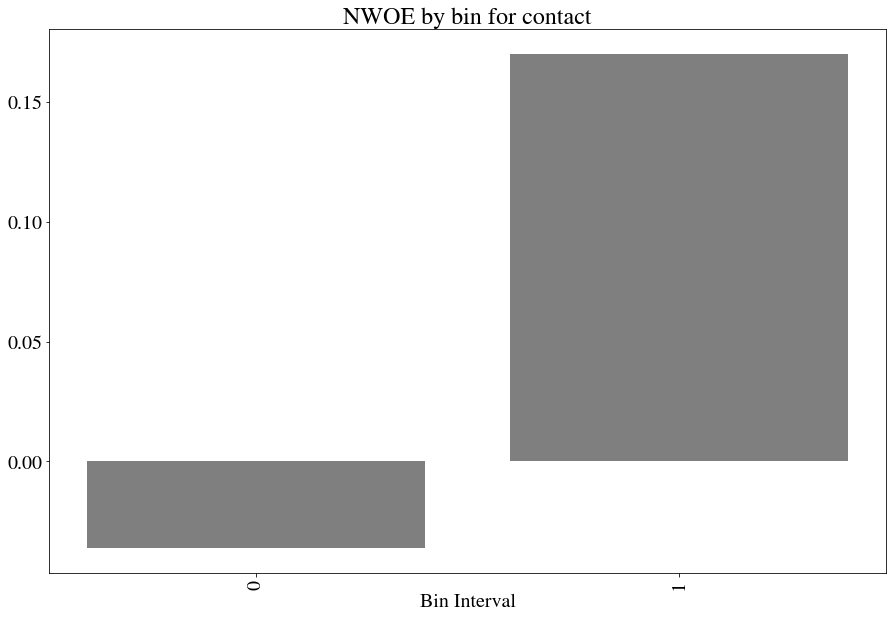

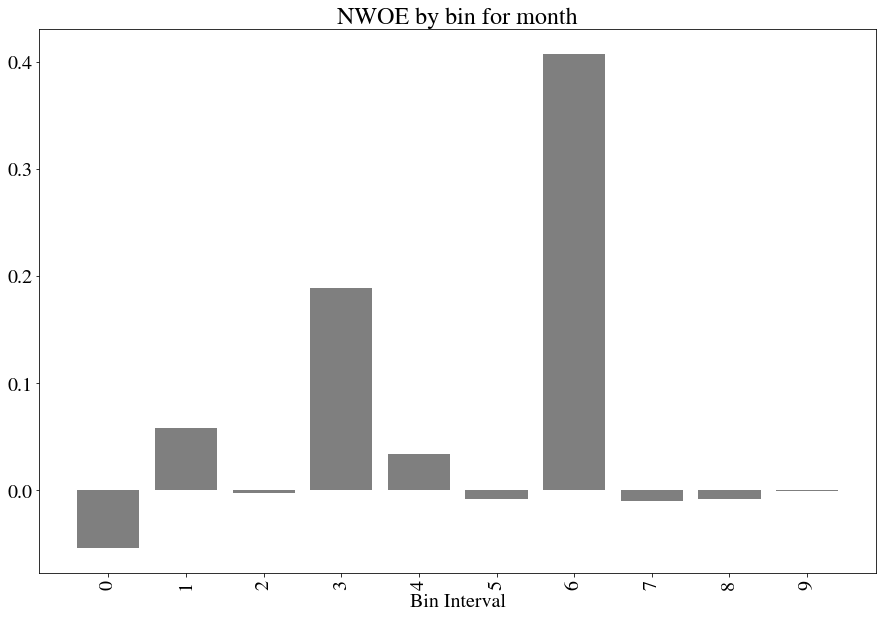

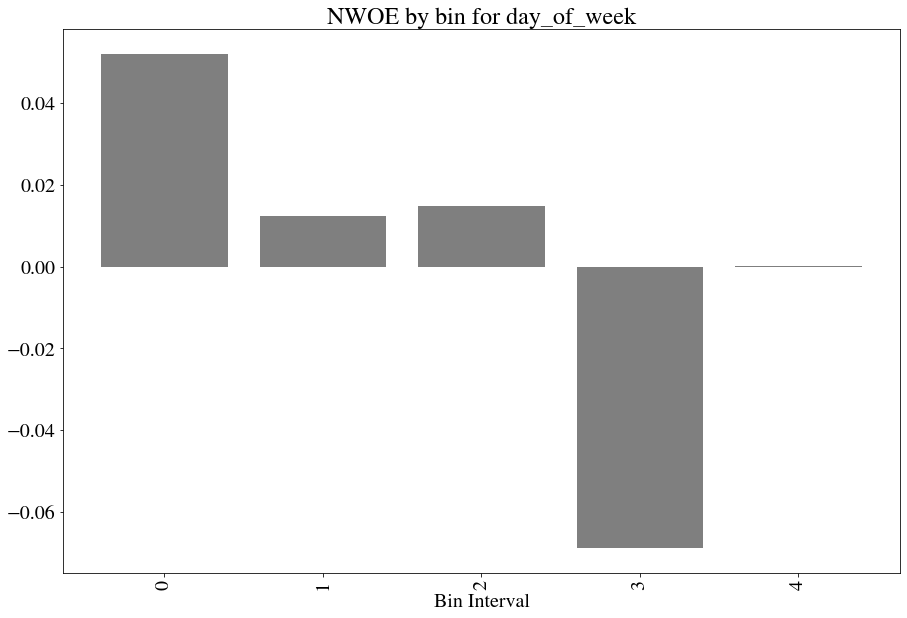

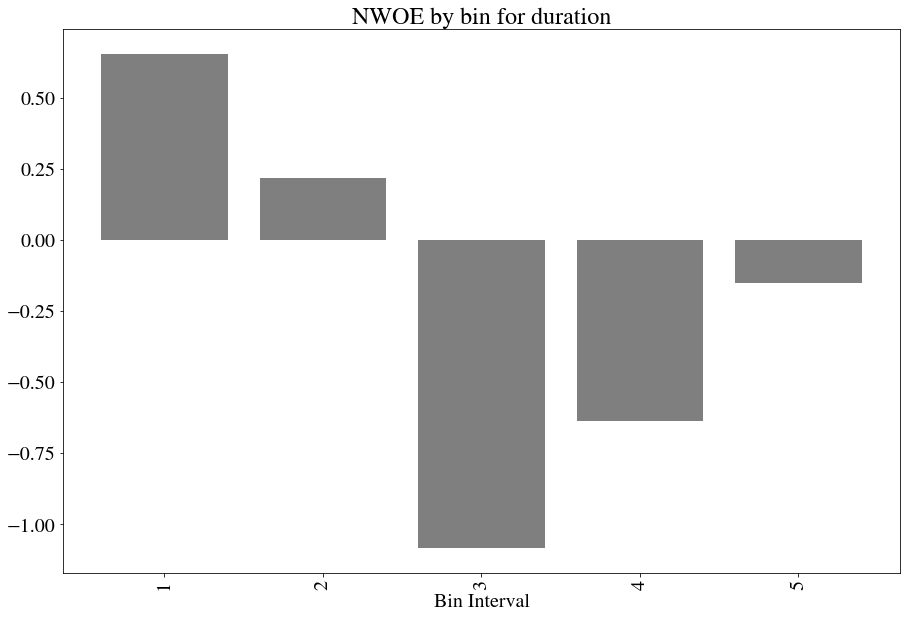

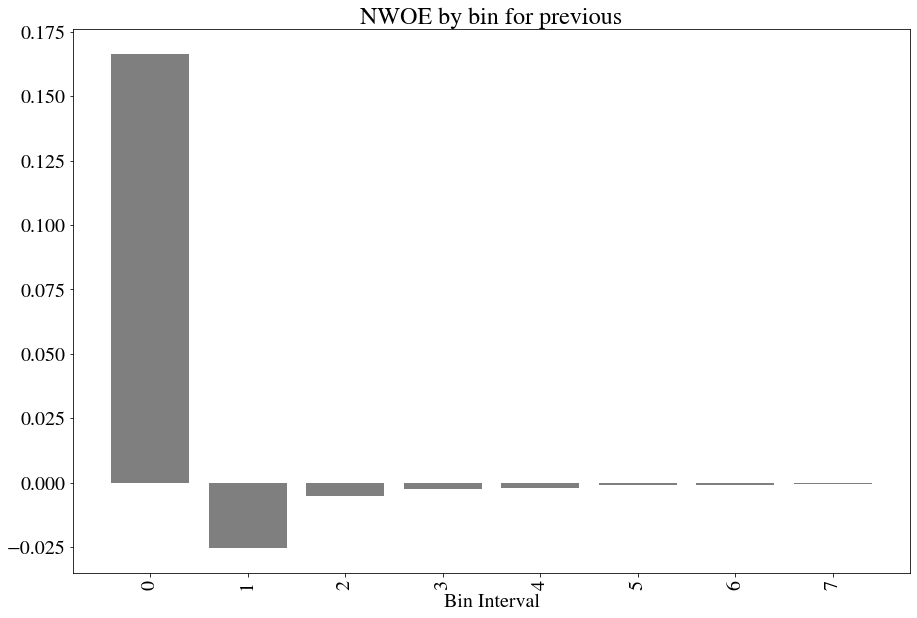

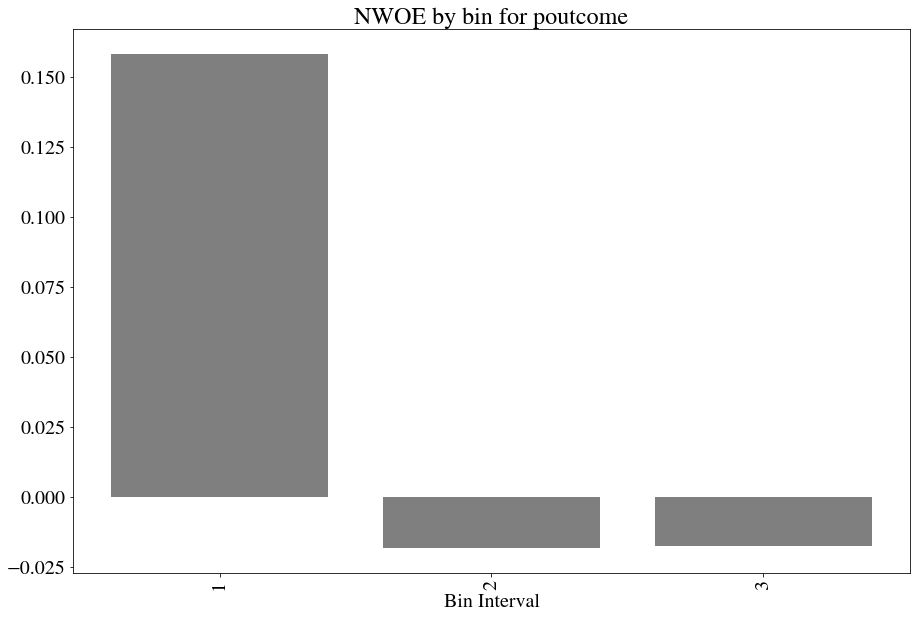

In [84]:
up.NWOE()

# Net Information Value

- Information Value (NIV) is the sum of all WOE values, weighted by the absolute difference in the numerator and denominator.

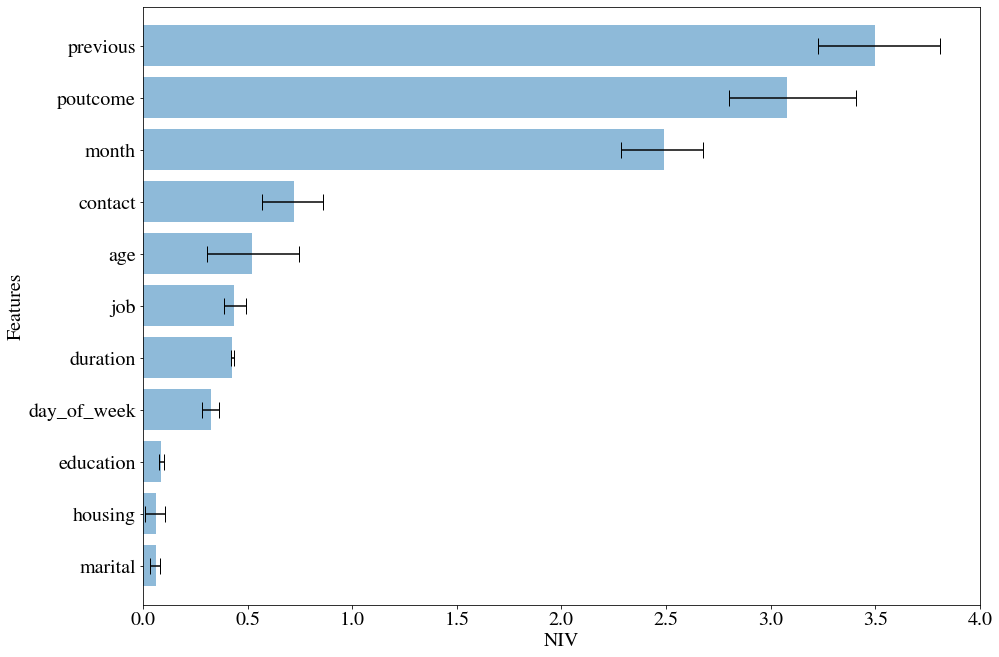

In [85]:
# This function randomly shuffles your training data set and calculates net information
up.NIV()

In [86]:
# Count NIV score
up.NIV_dict

{'age': 0.5225164085157593,
 'job': 0.4363217605072751,
 'marital': 0.0597644941900988,
 'education': 0.08722449372422954,
 'housing': 0.06163729671851756,
 'contact': 0.721209720225587,
 'month': 2.4900466919969397,
 'day_of_week': 0.32456387833373485,
 'duration': 0.42700097595732595,
 'previous': 3.4968852591486215,
 'poutcome': 3.0790404307431163}

# QINI

- The Qini coefficient by Radcliffe, presents a generalization of the Gini coefficient. This is based on the ‘‘Gains Chart for Uplift,’’ or the Qini curve, which is similar to the regular gains curve.

- The Qini curve plots the cumulative difference in response rate between treatment and control test sets as a function of a selected fraction x of the entities as ranked by the uplift model from high to low uplift.
- This curve is also called the cumulative uplift or the cumulative incremental gains.

source: A Literature Survey and Experimental Evaluation
of the State-of-the-Art in Uplift Modeling:
A Stepping Stone Toward the Development
of Prescriptive Analytics
(Floris Devriendt,1,* Darie Moldovan,2 and Wouter Verbeke1)


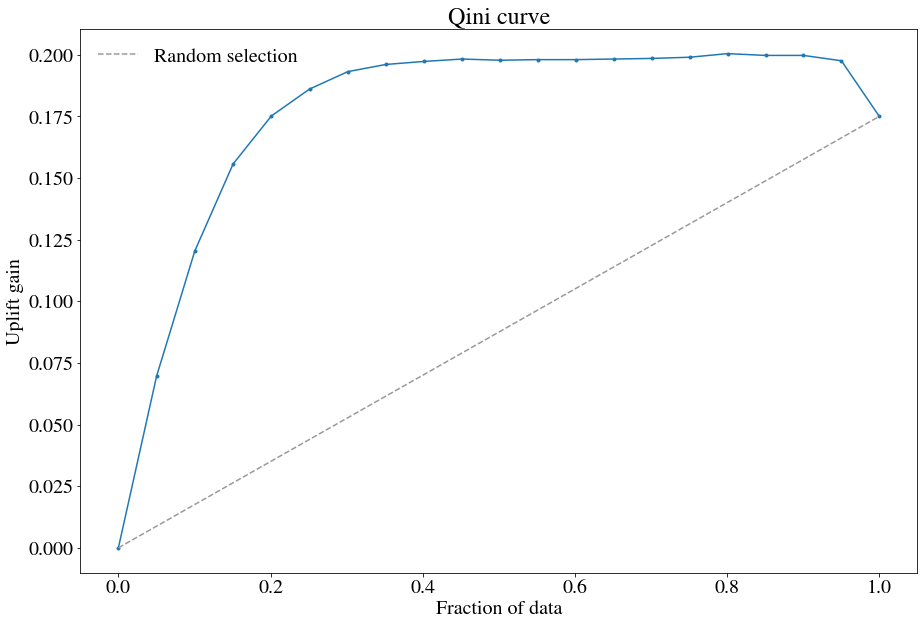

In [87]:
up.plot(plot_type='qini')

# AQINI

- ‘Aqini’ refers to an adjusted qini plot.
- The adjusted Qini can be useful when the percentage targeted is small and treatment group members are valued disproportionately higher. In such a case, the adjusted Qini overvalues treatment group information to prevent overspending.

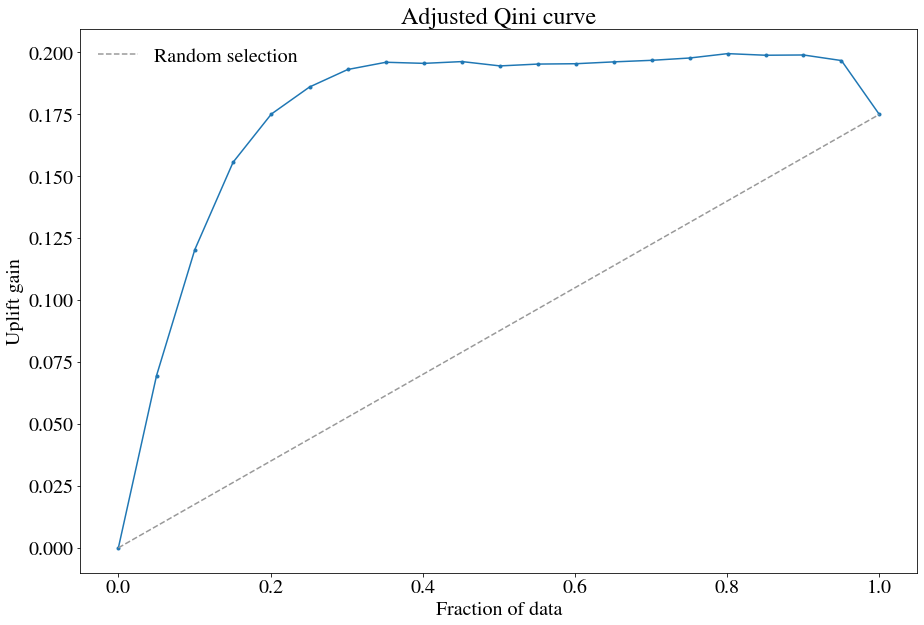

In [88]:
up.plot(plot_type='aqini')

# Cumulative Gain Chart

- Lift is a measure of the effectiveness of a predictive model calculated as the ratio between the results obtained with and without the predictive model.
- Cumulative gains and lift charts are visual aids for measuring model performance
- Both charts consist of a lift curve and a baseline
- The greater the area between the lift curve and the baseline, the better the model

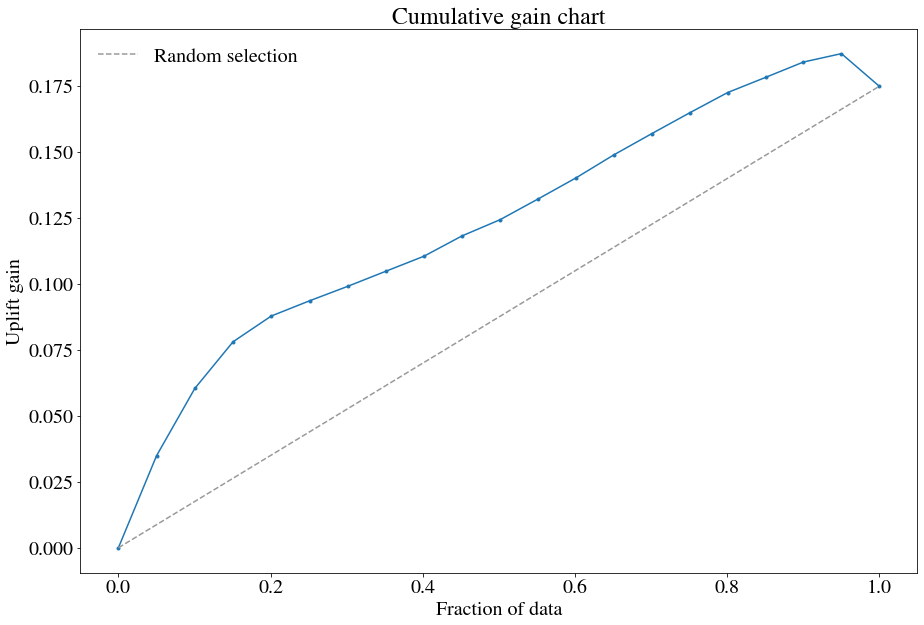

In [89]:
up.plot()

Cumulative Gains Chart:

- The y-axis shows the percentage of positive responses. This is a percentage of the total possible positive responses (4640 as the overall response rate).
- The x-axis shows the percentage of customers contacted, which is a fraction of the 41,188 total customers.
- Baseline (overall response rate): If we contact X% of customers then we will receive X% of the total positive responses.

- Cumulative gains and lift charts are a graphical representation of the advantage of using a predictive model to choose which customers to contact.

In [90]:
up.shuffle_fit(params=up.rand_search_.best_params_, nthread=30, iterations=5);

Seed 0 finished.
Seed 1 finished.
Seed 2 finished.
Seed 3 finished.
Seed 4 finished.


# Cumulative Gain Chart - Bin Concentration

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


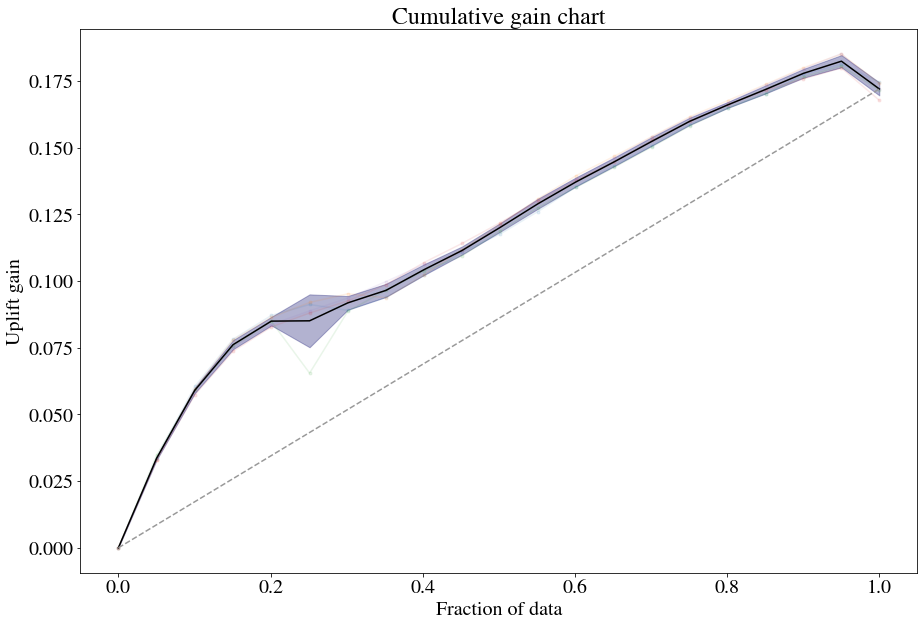

In [91]:

up.plot(show_shuffle_fits=True)

# Cumulative Gain Chart with Theoretical & Practical Max

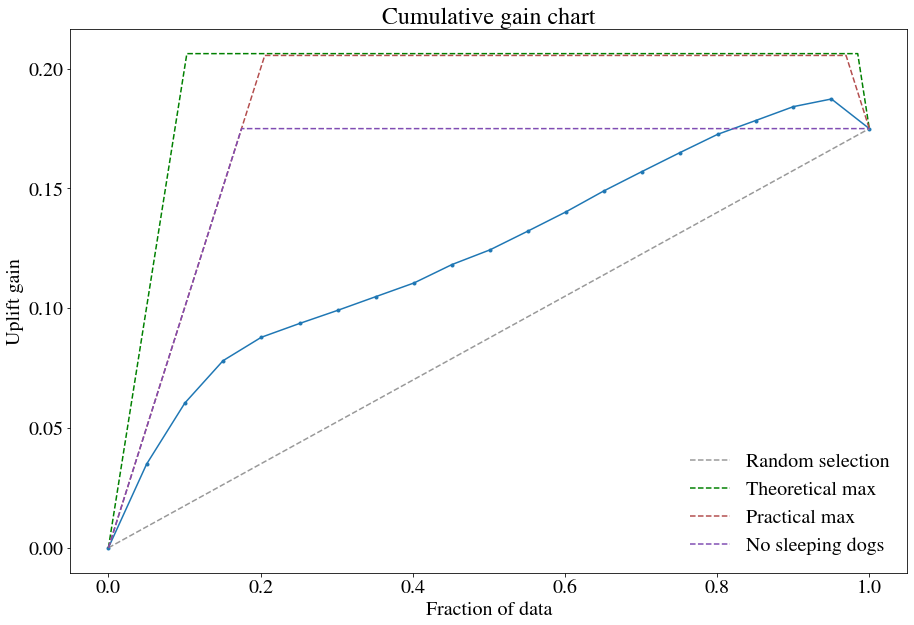

In [92]:

up.plot(show_theoretical_max=True, show_practical_max=True, show_no_dogs=True)

# Cumulative Uplift Curve

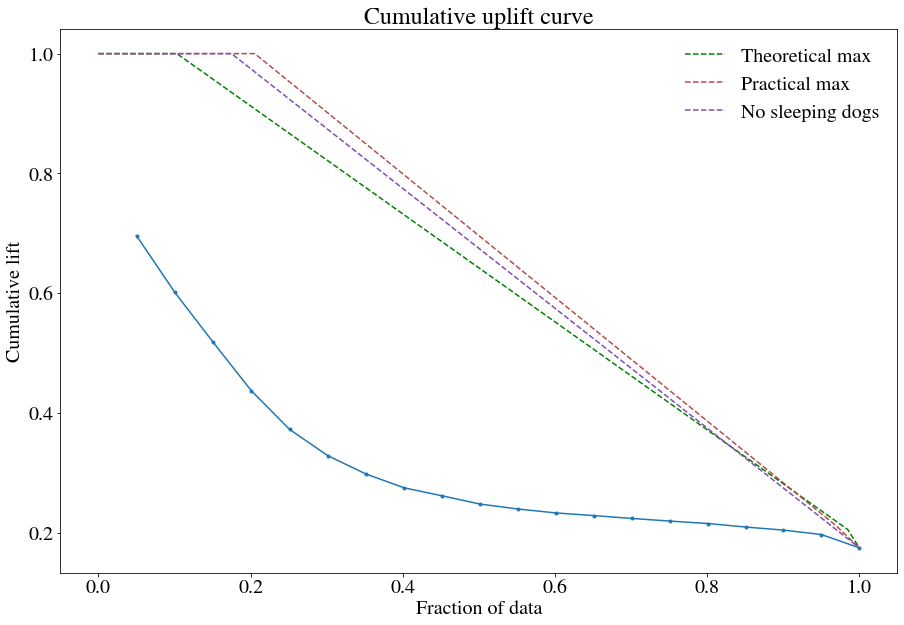

In [93]:
up.plot(plot_type='cuplift', show_theoretical_max=True, show_practical_max=True, show_no_dogs=True)

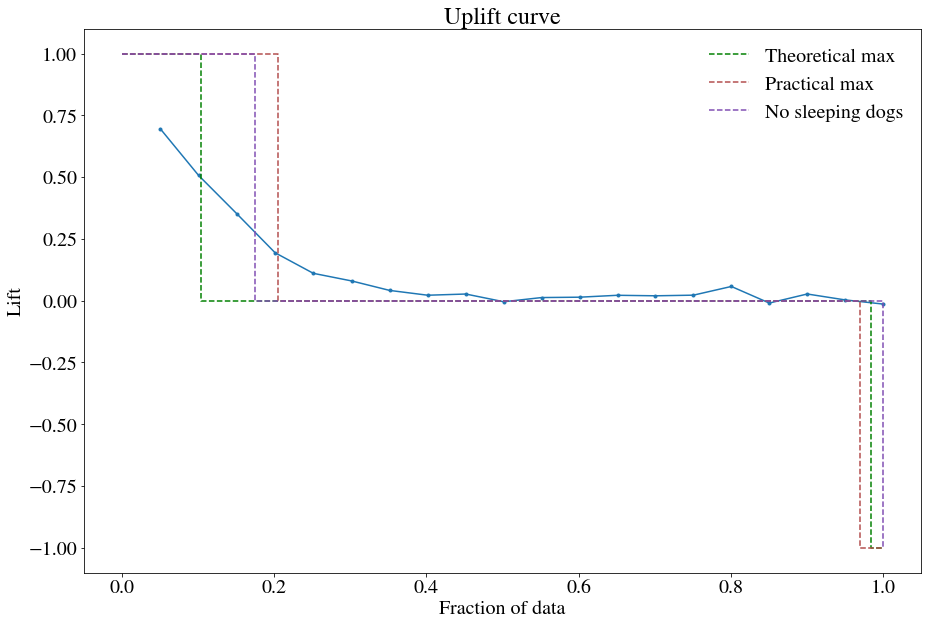

In [94]:
up.plot(plot_type='uplift', show_theoretical_max=True, show_practical_max=True, show_no_dogs=True)

- The lift chart shows how much more likely we are to receive respondents than if we contact a random sample of customers. For example, by contacting only 30% of customers situated in the top 3 deciles(bins) we would reach 75% of the total Treatment-Responder customers.
- Customers situated between 0.3 and 0.9 bin are likely to be in TN and CN groups.
- Customers on the far right, situated in the 10th bin, are likely to be in the CR group, sleeping dogs, and are best left alone.

# Using other models


In [95]:
from pylift.eval import UpliftEval


In [96]:
upev = UpliftEval(up.tc_test, up.y_test, up.transformed_y_test_pred)

No handles with labels found to put in legend.


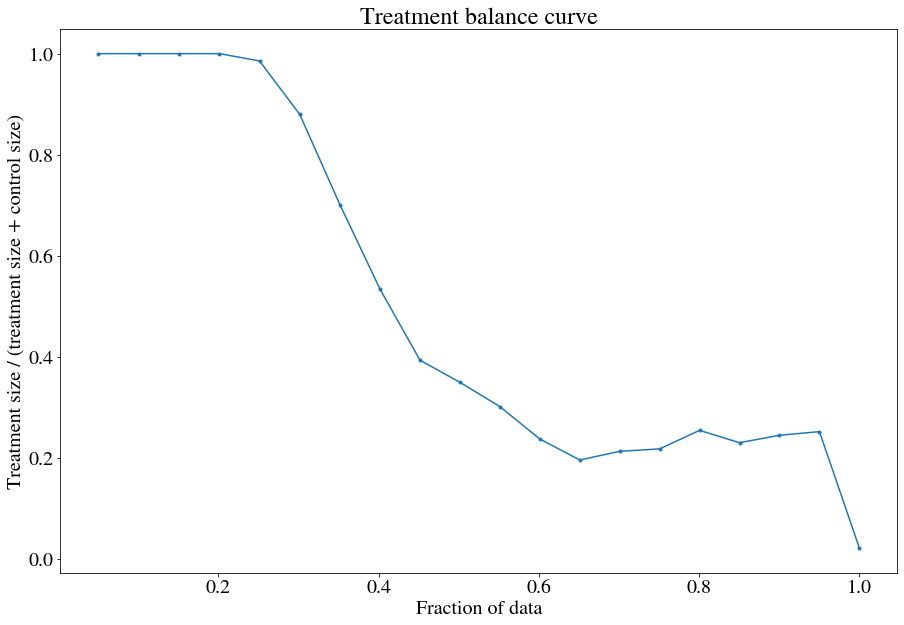

In [97]:
up.plot(plot_type='balance')

In [98]:
# Overfitting theoretical maximal qini curve.
upev.qini_max_x  # percentile
upev.qini_max_y

# "Practical" max curve.
upev.qini_pmax_x
upev.qini_pmax_y

# No sleeping dogs curve.
upev.qini_nosdmax_x
upev.qini_nosdmax_y

[0, 0.1749580575679331, 0.1749580575679331, 0.17495805756793312]

In [99]:

# up.randomized_search -> up_rand_search_
up.rand_search_

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002590CBFF9C8>,
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
       

# Adjusted Qini Score - Percentile Uplift Distribution

Text(0.5, 0, 'Adjusted Qini score')

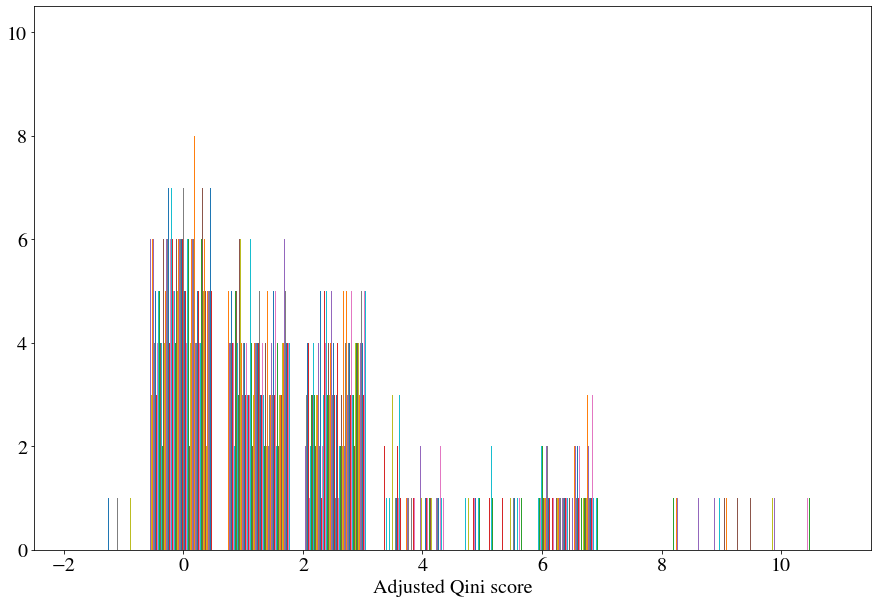

In [100]:
results = up.rand_search_.cv_results_
plt.figure(figsize=(15,10))
plt.hist(up.df, bins=10)
plt.xlabel('Adjusted Qini score')

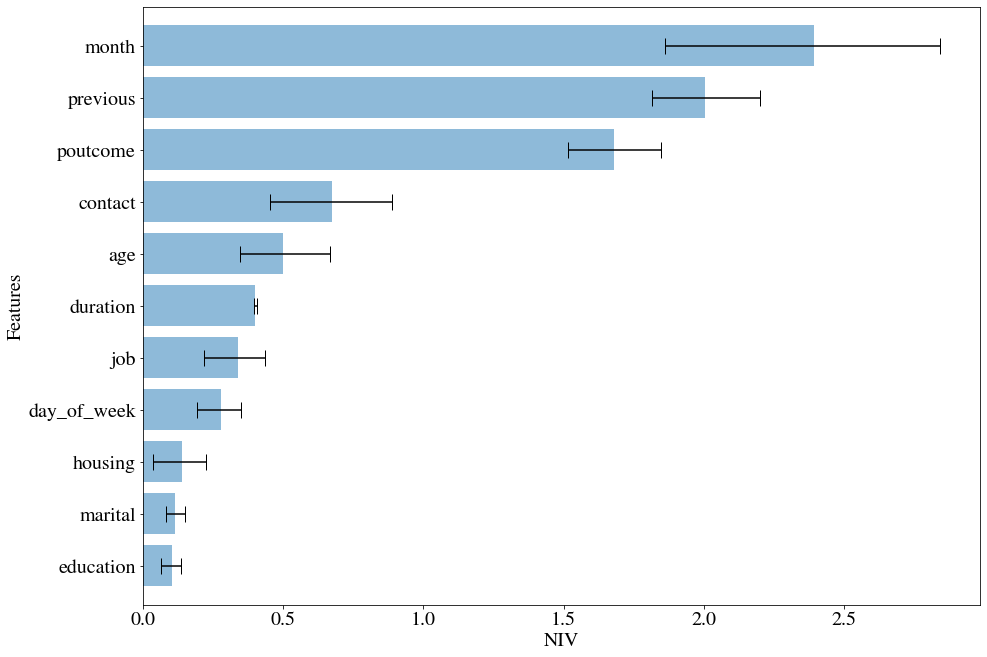

In [101]:
up.NIV()